<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/LinearRegression/LinearRegression_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression- Concrete

**Context:**

Concrete strength is crucial in construction. It's affected by ingredients and age. Understanding these factors helps optimize concrete mix designs and ensure safety.

**Objective:**

To build a model that predicts concrete strength based on its components and age. This helps optimize mix designs, control quality, predict maintenance needs, and save resources.

**Data Dictionary:**

Cement: Amount of cement used in the mix (kg/m³)

BlastFurnaceSlag: Amount of blast furnace slag used (kg/m³)

FlyAsh: Amount of fly ash used (kg/m³)

Water: Amount of water used (kg/m³)
Superplasticizer: Amount of superplasticizer used (kg/m³)

CoarseAggregate: Amount of coarse aggregate used (kg/m³)

FineAggregate: Amount of fine aggregate used (kg/m³)

Age: Age of the concrete sample in days

Strength: Compressive strength of the concrete (MPa) - This is the target variable we want to predict.

#Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

#Loading dataset

In [3]:
df=pd.read_csv('/content/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#checking shape of the data
df.shape

(1030, 9)

**Observations:**
* There are 1030 rows and 9 columns in the data

In [5]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


**Observation:**
* All columns are in expected data type.

#summary statistics

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Observations:**
* We can observe that for columns Cement,Water, Superplasticizer, Coarse Aggregate,Fine Aggrergate and strength mean and median are almost equal, implying the data is distributed symmetrically.

* For columns,Furnace slag, Fly Ash, and Age mean is greater than median implying there may be outliers in the right tail.

#Exploratory Data Analysis

**Checking for null values**

In [7]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


**Observations:**
* There are no null values in the data set.


**Checking duplicates**

In [8]:
df.duplicated().sum()

np.int64(25)

**Observations:**
* There are 25 duplicate values in the data

**Dropping the duplicates**

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#Checking
df.duplicated().sum()

np.int64(0)

**Observations:**
* Now there are no duplicate values in the data.

In [11]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [15]:
df['Cement'].value_counts()

,count
Cement,
251.4,15
446.0,14
310.0,14
250.0,13
475.0,13
...,...
276.4,1
322.2,1
148.5,1


In [16]:
df['Strength'].value_counts()

,count
Strength,
23.52,4
31.35,4
33.40,4
41.05,4
44.52,3
...,...
18.29,1
29.41,1
39.36,1


In [17]:
df.groupby(['Strength']).max().sort_values(by='Strength', ascending=False)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
Strength,,,,,,,,
82.60,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91
81.75,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28
80.20,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56
79.99,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
79.40,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56
...,...,...,...,...,...,...,...,...
4.83,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3
4.78,153.0,102.0,0.0,192.0,0.0,888.0,943.1,3
4.57,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3


#Univariate Analysis

HistPlot for strength



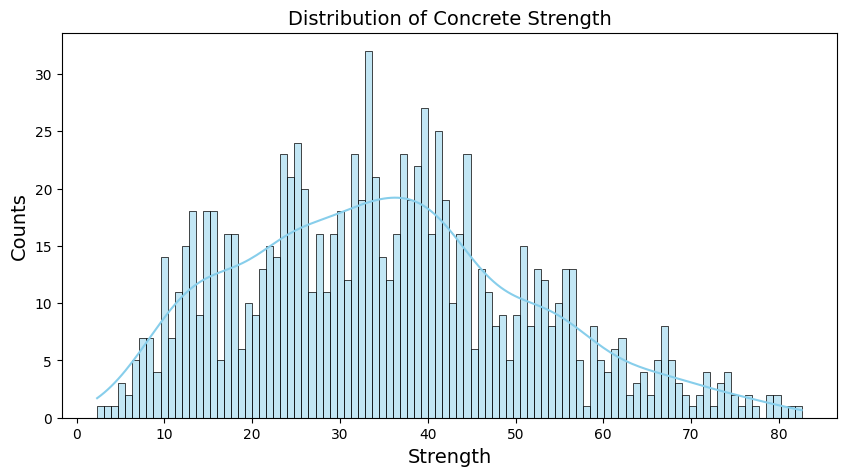

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'Strength', data = df, bins = 100, kde=True, color = 'skyblue')
plt.xlabel('Strength', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Distribution of Concrete Strength', fontsize=14)
plt.show()

**Observations:**
* Data is slightly right skewed

<function matplotlib.pyplot.show(close=None, block=None)>

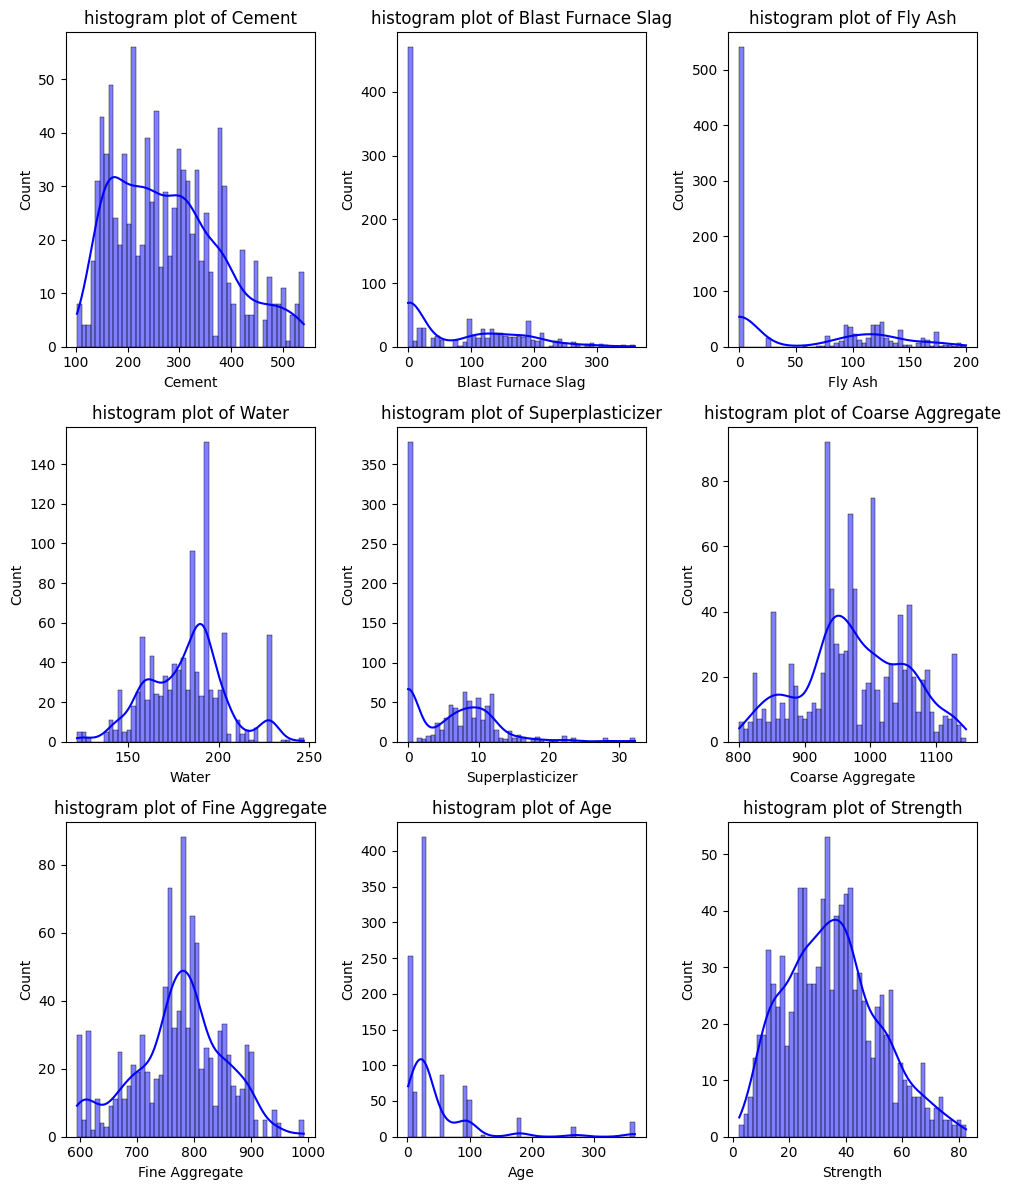

In [19]:
# Histplot for all columns

plt.figure(figsize=(10,12))
j = 1
for i in df.columns:
    plt.subplot(3,3,j)
    sns.histplot(df[i], bins=50, kde=True, color='b')
    plt.title(f'histogram plot of {i}')
    j+=1
plt.tight_layout()
plt.show

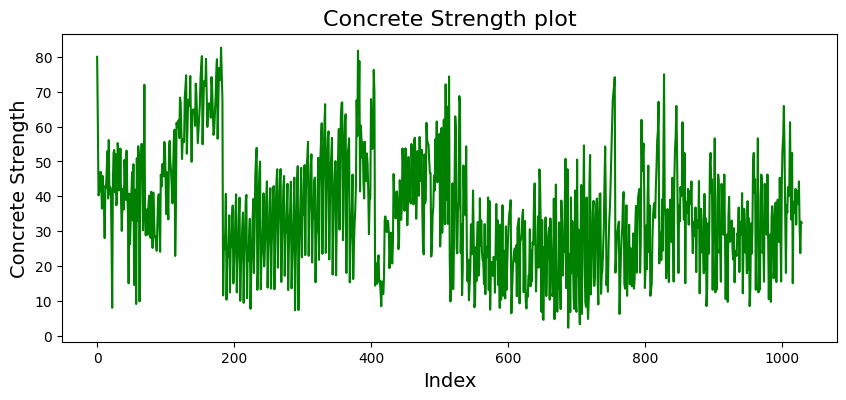

In [20]:
plt.figure(figsize=(10,4))
plt.plot(df.Strength.index, df.Strength, color='g')
plt.title('Concrete Strength plot', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Concrete Strength', fontsize=14)
plt.show()

Bi-Variate Analysis

<Figure size 700x500 with 0 Axes>

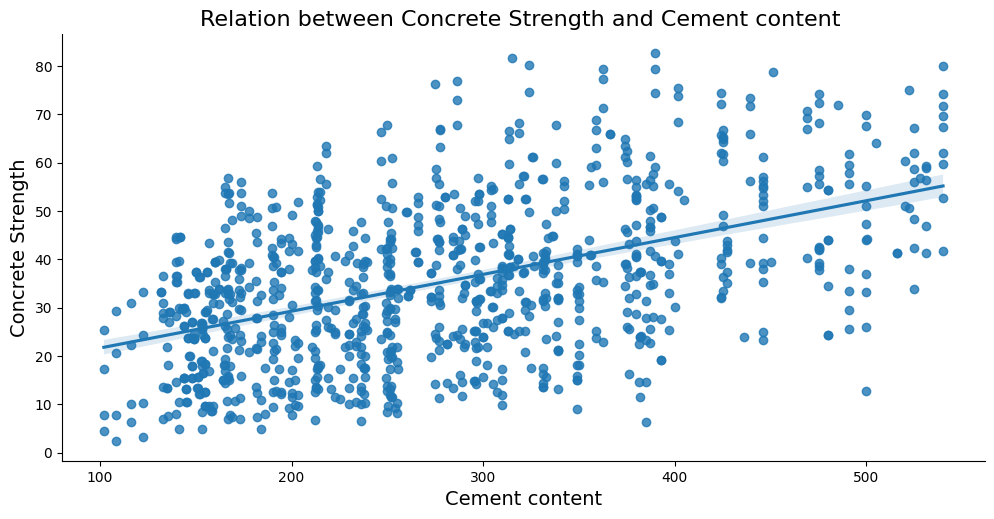

In [22]:
# Concrete strength vs Cement Content
plt.figure(figsize=(7,5))
sns.lmplot(x = 'Cement', y = 'Strength', data = df, height = 5, aspect = 2, markers = 'o')
plt.title('Relation between Concrete Strength and Cement content ', fontsize=16)
plt.xlabel('Cement content', fontsize=14)
plt.ylabel('Concrete Strength', fontsize=14)
plt.show()

**Observations:**

* Positive, linear correlation between cement content and concrete strength.
* Strength variation exists even at similar cement levels, indicating other influencing factors.

**Multi-vatriate Analysis**

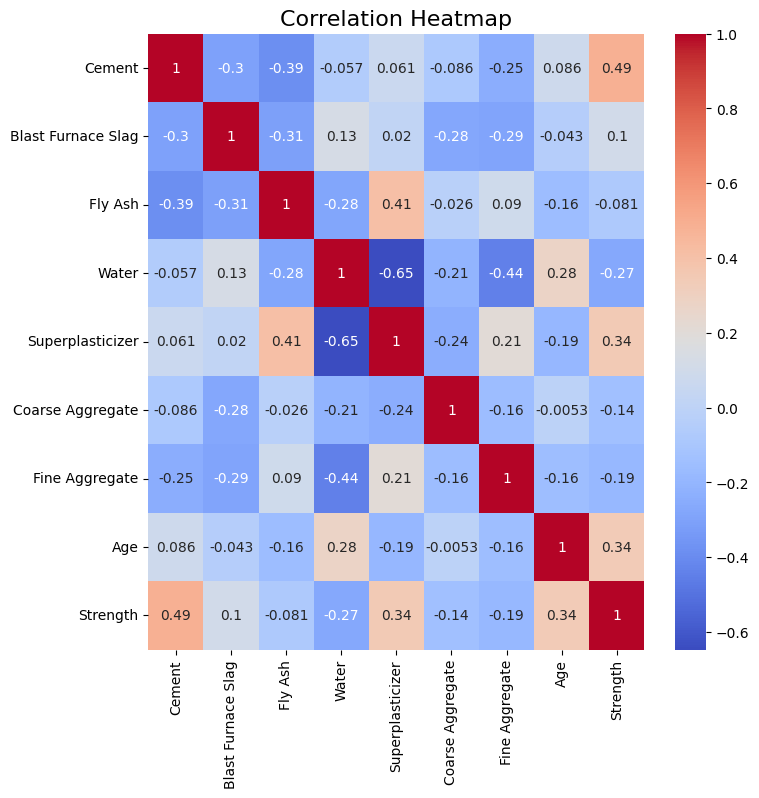

In [24]:
#Correlation analysis using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


**Observations:**
* We can observe, Strength is positively correlated with Cement, Superplasticizer and Age.

* Superplasticizer and Fly Ash are positively correlated.

* we can observe, negative correlation of water with superplasticizer and Fine Aggregate.

# Model Building

**Segregating input and output features**

In [25]:
X=df.drop('Strength', axis=1)
y=df['Strength']

#Preprocessing


In [26]:
#Feature Scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)


#Splitting train and test data


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [37]:
# Building Multiple linear regression model
lr=LinearRegression()

# Fitting the data
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
#Training the data
y_train_pred=lr.predict(X_train)
y_pred=lr.predict(X_test)

In [39]:
#Evaluating the model performance

print('Training R2_score:', np.round(r2_score(y_train,y_train_pred),2))
print('Testing R2_score:' ,np.round(r2_score(y_test,y_pred),2))

Training R2_score: 0.6
Testing R2_score: 0.62


#Optimizing the model performance

In [40]:
#Hyperparameter tuning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split

model = Ridge()  # or Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Values for regularization strength

In [41]:
#Create a grid searchCV object

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

In [42]:
#Fit the GridSearchCV object to the training data:

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [43]:
#Get the best hyperparameters and model:

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [44]:
best_params

{'alpha': 1}

In [47]:
#Training the data
y_train_pred=best_model.predict(X_train)
y_pred=best_model.predict(X_test)



In [48]:
#Evaluating the model performance

print('Training R2_score:', np.round(r2_score(y_train,y_train_pred),2))
print('Testing R2_score:' ,np.round(r2_score(y_test,y_pred),2))

Training R2_score: 0.6
Testing R2_score: 0.62


**Observation:**

The training R-squared score (0.60) and the testing R-squared score (0.62) are relatively close, indicating that the model is not overfitting and generalizes well to unseen data.
Both R-squared scores are around 0.60, which suggests that the model explains about 60% of the variance in the target variable (concrete strength). This is a moderate level of performance.

#**Conclusion:**

The linear regression model built for the concrete data demonstrates a moderate level of performance, with an R-squared score of around 0.60. The model generalizes reasonably well to unseen data, as indicated by the similar training and testing scores.

**Potential Improvements:**

Feature Engineering: Explore new features or transformations of existing features to potentially improve model accuracy.

Different Models: Consider trying other regression models like Support Vector Regression or Random Forest Regression to see if they can achieve better performance.

Hyperparameter Tuning: Fine-tune the hyperparameters of the chosen model to further optimize its performance.